# neuralnetworksanddeeplearning

http://neuralnetworksanddeeplearning.com/chap1.html

Perceptrons were developed in the 1950s and 1960s by the scientist Frank Rosenblatt, inspired by earlier work by Warren McCulloch and Walter Pitts. A perceptron takes several binary inputs, $x_{1},x_{2},…$, and produces a single binary output

Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output. That's the crucial fact which will allow a network of sigmoid neurons to learn. Just like a perceptron, the sigmoid neuron has inputs, $x_{1},x_{2},…$. But instead of being just 0 or 1, these inputs can also take on any values between 0 and 1. 

Also just like a perceptron, the sigmoid neuron has weights for each input, $w_{1},w_{2},…$, and an overall bias, $b$. But the output is not 0 or 1. Instead, it's $σ(w⋅x+b)$, where $σ$ is called the sigmoid function, and is defined by:

$$σ(z) ≡ \frac{1}{1+e^{−z}}$$

Or more explicitly:

$$σ(z) ≡ \frac{1}{1 + \exp(-\sum_{j} w_{j} x_{j} - b)}$$

In the limit the sigmoid function turns to a heaviside function, the neuron becomes a perceptron.


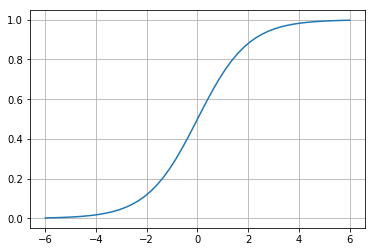

In [2]:
# Sigmoid function
import matplotlib.pyplot as plt
import numpy as np
from math import exp

xs = np.linspace(-6., 6.)
ys = [1./(1 + exp(-x)) for x in xs]

fig, ax = plt.subplots()
plt.plot(xs, ys)
ax.grid()

The smoothness of $σ$ means that small changes $Δwj$ in the weights and $Δb$ in the bias will produce a small change $Δoutput$ in the output from the neuron. In fact, calculus tells us that $Δoutput$ is well approximated by
$$Δoutput≈ \sum_{j}\frac{∂output}{∂w_{j}}Δw_{j} + \frac{∂output}{∂b}Δb$$

This means that $Δoutput$ is a linear function of the changes $Δw_{j}$ and $Δb$ in the weights and bias.

## The architecture of neural networks

The leftmost layer in this network is called the input layer, and the neurons within the layer are called input neurons. The rightmost or output layer contains the output neurons, or, as in this case, a single output neuron. The middle layer is called a hidden layer, since the neurons in this layer are neither inputs nor outputs.

While the design of the input and output layers of a neural network is often straightforward, there can be quite an art to the design of the hidden layers.

<b>feedforward neural networks</b> - Networks where the output from one layer is used as input to the next layer.

However, there are other models of artificial neural networks in which feedback loops are possible. These models are called <b>recurrent neural networks</b>. The idea in these models is to have neurons which fire for some limited duration of time, before becoming quiescent.

Recurrent neural nets have been less influential than feedforward networks, in part because the learning algorithms for recurrent nets are (at least to date) less powerful. 

## A simple network to classify handwritten digits

Three-layer neural network:

![Image](Images/tikz12.PNG)

- Training data for the network will consist of many <b>28 by 28</b> pixel images of scanned handwritten digits, and so the input layer contains 784 = 28×28 neurons.

- The input pixels are greyscale, with a value of 0.0 representing white, a value of 1.0 representing black, and in between values representing gradually darkening shades of grey.

- The second layer of the network is a hidden layer. We denote the number of neurons in this hidden layer by n, and we'll experiment with different values for n. The example shown illustrates a small hidden layer, containing just n=15 neurons.

### MNIST dataset

- train-images-idx3-ubyte: training set images 
- train-labels-idx1-ubyte: training set labels 
- t10k-images-idx3-ubyte:  test set images 
- t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.

## Neural network design

We'll use the notation x to denote a training input. It'll be convenient to regard each training input $x$ as a 28×28=784-dimensional vector. 

Define the quadratic cost function (mean squared error):

$$C(w,b) = \frac{1}{2n}\sum_{x}\left|\left|y(x) - a\right|\right|^{2}$$

Where $n$ is the total number of training inputs, $a$ is the vector of outputs from the network when $x$ is input, $w$ and $b$ denote the vector of weights and biases respectively.

The choice of a quadratic cost function makes it easier to disentangle and optimise improvements from changes in the weights and biases.

## Gradient descent

The gradient vector of the cost function with variables $v$ is given by:

$$∇C≡\left(\frac{∂C}{∂v_{1}},...,\frac{∂C}{∂v_{m}}\right)^{T}$$

Choose $Δv$ so as to make $ΔC$ negative. In particular, suppose we choose:

$$Δv=−η∇C$$

where $η$ is a small, positive parameter (known as the learning rate). This gives us a way of following the gradient to a minimum, even when C is a function of many variables, by repeatedly applying the update rule:

$$v→v′=v−η∇C$$

Restating the gradient descent update rule, with the weights and biases replacing the variables $v_{j}$ we can write:

$$w_{k}→w^{'}_{k}=w_{k} − η\frac{∂C}{∂w_{k}}$$
$$b_{l}→b^{'}_{l}=b_{l} − η\frac{∂C}{∂b_{l}}$$


### Stochastic gradient descent
Computing the gradient for large numbers of inputs can be time consuming. An idea called <b>stochastic gradient descent</b> can be used to speed up learning. The idea is to estimate the gradient $∇C$ by computing $∇C_{x}$ for a small sample of randomly chosen training inputs. By averaging over this small sample it turns out that we can quickly get a good estimate of the true gradient $∇C$, and this helps speed up gradient descent, and thus learning. Stochastic gradient descent works by randomly picking out a small number $m$ of randomly chosen training inputs. We'll label those random training inputs $X_{1},X_{2},…,X_{m}$, and refer to them as a mini-batch.

Stochastic gradient descent works by picking out a randomly chosen mini-batch of training inputs, and training with those,

$$w_{k}→w^{'}_{k}=w_{k} − \frac{η}{m}\sum_{j}\frac{∂C_{X_{j}}}{∂w_{k}}$$
$$b_{l}→b^{'}_{l}=b_{l} − \frac{η}{m}\sum_{j}\frac{∂C_{X_{j}}}{∂b_{l}}$$

where the sums are over all the training examples $X_{j}$ in the current mini-batch. Then we pick out another randomly chosen mini-batch and train with those. And so on, until we've exhausted the training inputs, which is said to complete an <b>epoch</b> of training. At that point we start over with a new training epoch.

## Neural network code (network.py)

Constructor is array with the size defining the number of layers and the values representing the number of neurons per layer, for example a 2-3-1 network is defined:

```python
net = Network([2, 3, 1])
```

The biases and weights in the Network object are all initialized randomly, using a Gaussian distribution with mean 0 and standard deviation 1. In this example, the weights array is a matrix such that $w_{jk}$ is the weight for the connection between the k$^{th}$ neuron in the second layer, and the j$^{th}$ neuron in the third layer. The vector of activations of the third layer of neurons is given by:
$$a′=σ(wa+b)$$

The is used in the <i>feedforward</i> method.

Learning is done via a stochastic gradient descent algorithm, defined in the method <i>SGD</i>, which takes as inputs: the training data array, number of epochs, mini-batch size, learning rate $\eta$ and test data (optional).

- The training_data is a list of tuples $(x, y)$ representing the training inputs and corresponding desired outputs.
- If the optional argument test_data is supplied, then the program will evaluate the network after each epoch of training, and print out partial progress. This is useful for tracking progress, but slows things down substantially.

The code works as follows:

- In each epoch, it starts by randomly shuffling the training data, and then partitions it into mini-batches of the appropriate size. 
- Then for each mini_batch we apply a single step of gradient descent. This is done by the code <i>self.update_mini_batch(mini_batch, eta)</i>, which updates the network weights and biases according to a single iteration of gradient descent.

The <i>update_mini_batch</i> method makes use of the <i>backpropagation</i> method which determines the gradients of the cost functions.

### Output

net.weights[0] = (30, 784)
net.weights[1] = (10, 30)

net.bias[0] = (30, 1)
net.bias[1] = (10, 1)



# Chapter 2 - Backpropagation




At the heart of backpropagation is an expression for the partial derivative $∂C/∂w$ of the cost function $C$ with respect to any weight $w$ (or bias $b$) in the network. The expression tells us how quickly the cost changes when we change the weights and biases.

In the following, $w^{l}_{jk}$ denotes the weight for the connection from the $k^{th}$ neuron in the $(l−1)^{th}$ layer to the $j^{th}$ neuron in the  $l^{th}$ layer. Similarly we use $b^{l}_{j}$ for the bias of the $j^{th}$ neuron in the $l^{th}$ layer. And we use $a^{l}_{j}$ for the activation of the $j^{th}$ neuron in the $l^{th}$ layer. 

![image](images/CH2_1.PNG)

The activation $a^{l}_{j}$ of the $j^{th}$ neuron in the $l^{th}$ layer is related to the activations in the $(l−1)^{th}$ layer by the equation:

$$a^{l}_{j} = σ\left(\sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j}\right)$$

Vectorisation notation:

$$σ(v) = σ(v_{j})$$

Enables a simplification to the following:

$$a^{l} = σ\left(w^{l} a^{l-1} + b^{l}\right)$$

Define the weighted input to neurons in layer $l$: $z^{l} = w^{l} a^{l-1} + b^{l}$

## Cost function and backpropagation

Two assumptions:
- The cost function can be written as an average $C= \frac{1}{n} \sum_{x}C_{x}$ over cost functions $C_{x}$.
- The cost is that it can be written as a function of the outputs from the neural network.

Hadamard product: $s⊙t$ is a elementwise multiplication of vectors defined:

$$(s⊙t)_{j} = s_{j}t_{j}$$


Error $δ_{lj}$ of neuron $j$ in layer $l$ is given by:

$$δ^{l}_{j} ≡ \frac{∂C}{∂z^{l}_{j}}$$

<b>The error in the output layer, $δ^{L}$</b>:

$$δ^{L}_{j} =  \frac{∂C}{∂a^{L}_{j}}σ′(z^{L}_{j})$$

Which can be expressed more succinctly as:

$$δ^{L} = ∇_{a}C⊙σ′(z^{L})$$

<b>Equation for the error δl in terms of the error in the next layer, δl+1</b>:

$$δ^{l}=((w^{l+1})^{T}δ^{l+1})⊙σ′(z^{l})$$